# Face Recognition

In a previous lab we used SVM and PCA to build a face recognition model for some famous faces. Let's do it using an artificial neural network and see how it performs.

One caveat, since these are images, we should be using a convolutional neural network but I won't talk about those until after Easter. I think the ANN might do ok

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60, resize=1)

I'm deliberately picking faces.images over faces.data here due to the shape

In [4]:
X = faces.images
y = faces.target

In [5]:
X[0]

array([[0.5281046 , 0.5176471 , 0.5058823 , ..., 0.25751635, 0.25882354,
        0.25490198],
       [0.5398693 , 0.5411765 , 0.54901963, ..., 0.2653595 , 0.26143792,
        0.25882354],
       [0.5568628 , 0.5660131 , 0.5660131 , ..., 0.2627451 , 0.2640523 ,
        0.2640523 ],
       ...,
       [0.2535948 , 0.5281046 , 0.71895427, ..., 0.00653595, 0.00653595,
        0.00261438],
       [0.19738562, 0.44183007, 0.6653595 , ..., 0.00653595, 0.00261438,
        0.00261438],
       [0.1267974 , 0.34379086, 0.56993467, ..., 0.00653595, 0.00261438,
        0.00261438]], dtype=float32)

All values are between 0 and 1 so greyscale. No need to do any /255 like we did in the digits dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1138)

In [7]:
import tensorflow as tf

2025-03-31 14:15:38.307864: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-31 14:15:38.371239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-31 14:15:38.707185: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-31 14:15:38.873031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743430539.090993   50951 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743430539.15

Things to remember
- If the training loss is too high (or training accuracy is too low) this means your model is underfit and you may need a more complicated model
- If the validation loss is too high, while training loss is too low, your model is overfit. Maybe do less epochs, use early stopping, apply some form of regularisation
- Stanford course does say "don't use number of layers or units as a regularisation", i.e. don't just make the model simpler because of overfitting, apply regularisation instead

In [8]:
numberofclasses = np.unique(y).size

In [9]:
model = tf.keras.models.Sequential()

To start with I'm going with 3 hidden layers, each with 100 units. I also need to flatten the input as well.

The output layer needs as many units as the number of classes. 

In [10]:
model.add(tf.keras.layers.Flatten())

In [11]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [12]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [13]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [14]:
model.add(tf.keras.layers.Dense(numberofclasses))

In [15]:
#model.summary() will not work as we have not defined the shape in flatten. But it will work after fit

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

2025-03-31 14:15:46.019291: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2880 - loss: 2.3269 - val_accuracy: 0.3744 - val_loss: 1.7667
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4089 - loss: 1.7381 - val_accuracy: 0.4680 - val_loss: 1.6524
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4459 - loss: 1.6582 - val_accuracy: 0.4581 - val_loss: 1.6197
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4256 - loss: 1.6652 - val_accuracy: 0.5074 - val_loss: 1.4599
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4877 - loss: 1.4630 - val_accuracy: 0.4384 - val_loss: 1.5986
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4678 - loss: 1.5028 - val_accuracy: 0.6207 - val_loss: 1.2842
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5679 - loss: 1.2162 - val_accuracy: 0.5074 - val_loss: 1.2846
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5886 - loss: 1.1834 - val_accuracy: 0.

Look at that training accuracy. 99%!

Validation is only in the 80s so overfitting :(

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 11750)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,175,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,588,326 (13.69 MB)

 Trainable params: 1,196,108 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,392,218 (9.13 MB)

In [19]:
model.evaluate(X_test, y_test)

 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.2871

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8144 - loss: 0.8863 


[0.9656844139099121, 0.8130564093589783]

I got 82% accuracy which was around the same as SVM. But let's plot anyway

In [20]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

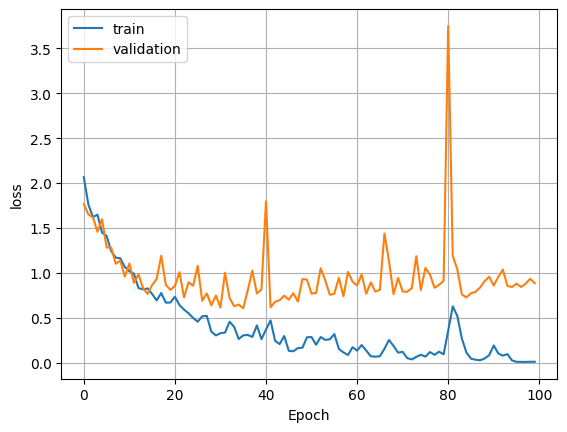

In [21]:
plot_loss(history)

In [22]:
X_train[0].shape

(125, 94)

Now it's your job to try out different networks.

Do different number of layers and units, what were the rules of thumb of I talked about in class? Try those

How about implementing some form of regularisation on the layers? Would this help?

How about using early stopping so it doesn't go for so many epochs?

Try different things and see if you can come up with a better network for this data

What about CNN? I think that would improve this by a bit!

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 11750)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │     1,175,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,196,108 (4.56 MB)

 Trainable params: 1,196,108 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1743 - loss: 3.0817 - val_accuracy: 0.3744 - val_loss: 1.8355
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2484 - loss: 2.1463 - val_accuracy: 0.4532 - val_loss: 1.7570
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2687 - loss: 1.9658 - val_accuracy: 0.2069 - val_loss: 1.9927
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2532 - loss: 1.9611 - val_accuracy: 0.3103 - val_loss: 1.8561
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2245 - loss: 1.9999 - val_accuracy: 0.4138 - val_loss: 1.8744
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2833 - loss: 1.8925 - val_accuracy: 0.4335 - val_loss: 1.6793
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2865 - loss: 1.8708 - val_accuracy: 0.4286 - val_loss: 1.6398
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3191 - loss: 1.7462 - val_accuracy: 0.

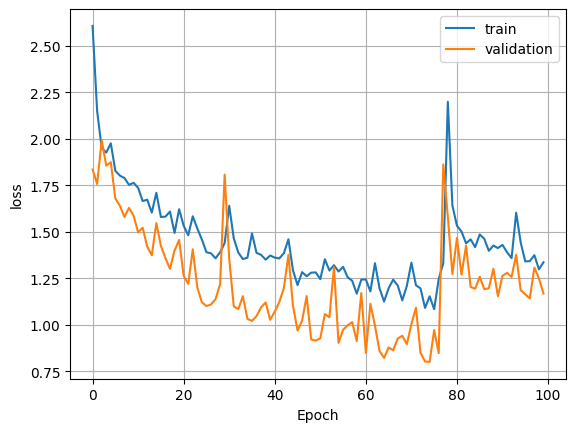

In [23]:
# again but with different layers and units, add some regularization
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=X_train[0].shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(numberofclasses))
model.add(tf.keras.layers.Dropout(0.5))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

# fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
model.evaluate(X_test, y_test)
plot_loss(history)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.2664 - loss: 2.0185 - val_accuracy: 0.3744 - val_loss: 1.9406
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.2712 - loss: 1.9417 - val_accuracy: 0.3744 - val_loss: 1.9342
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.2771 - loss: 1.9184 - val_accuracy: 0.4089 - val_loss: 1.8807
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.3132 - loss: 1.8784 - val_accuracy: 0.4729 - val_loss: 1.7008
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.2876 - loss: 1.7713 - val_accuracy: 0.5222 - val_loss: 1.4566
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.3236 - loss: 1.6604 - val_accuracy: 0.6108 - val_loss: 1.3586
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.3949 - loss: 1.5074 - val_accuracy: 0.6650 - val_loss: 1.2419
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.3897 - loss: 1.4761 - val_accu

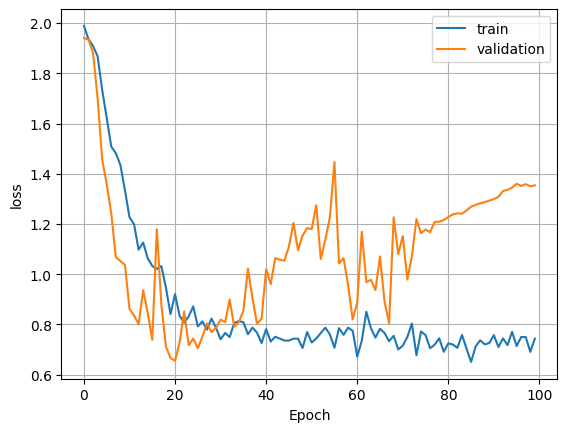

In [26]:
# Add channel dimension to input data
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(numberofclasses))
model.add(tf.keras.layers.Dropout(0.5))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
model.evaluate(X_test, y_test)

plot_loss(history)